In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk

In [2]:
df = pd.read_csv('UN.csv')

In [3]:
df.head()

,country,region,tfr,contraception,educationMale,educationFemale,lifeMale,lifeFemale,infantMortality,GDPperCapita,economicActivityMale,economicActivityFemale,illiteracyMale,illiteracyFemale
0,Afghanistan,Asia,6.90,NaN,NaN,NaN,45.0,46.0,154,2848,87.5,7.2,52.800,85.00
1,Albania,Europe,2.60,NaN,NaN,NaN,68.0,74.0,32,863,NaN,NaN,NaN,NaN
2,Algeria,Africa,3.81,52,11.1,9.9,67.5,70.3,44,1531,76.4,7.8,26.100,51.00
3,American.Samoa,Asia,NaN,NaN,NaN,NaN,68.0,73.0,11,NaN,58.8,42.4,0.264,0.36
4,Andorra,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Understanding the data

TFR : The number of children who would be born per woman (or per 1,000 women) if she/they were to pass through the childbearing years bearing children according to a current schedule of age-specific fertility rates.

## Handling Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 206
Data columns (total 14 columns):
country                   207 non-null object
region                    207 non-null object
tfr                       197 non-null float64
contraception             144 non-null float64
educationMale             76 non-null float64
educationFemale           76 non-null float64
lifeMale                  196 non-null float64
lifeFemale                196 non-null float64
infantMortality           201 non-null float64
GDPperCapita              197 non-null float64
economicActivityMale      165 non-null float64
economicActivityFemale    165 non-null float64
illiteracyMale            160 non-null float64
illiteracyFemale          160 non-null float64
dtypes: float64(12), object(2)

### Drop features with large number of missing data

In [5]:
df = df.drop(['educationMale','educationFemale'] , axis=1)

## Remove any row with missing data

In [6]:
df_no_missing = df.dropna()

In [7]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 2 to 206
Data columns (total 12 columns):
country                   97 non-null object
region                    97 non-null object
tfr                       97 non-null float64
contraception             97 non-null float64
lifeMale                  97 non-null float64
lifeFemale                97 non-null float64
infantMortality           97 non-null float64
GDPperCapita              97 non-null float64
economicActivityMale      97 non-null float64
economicActivityFemale    97 non-null float64
illiteracyMale            97 non-null float64
illiteracyFemale          97 non-null float64
dtypes: float64(10), object(2)

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


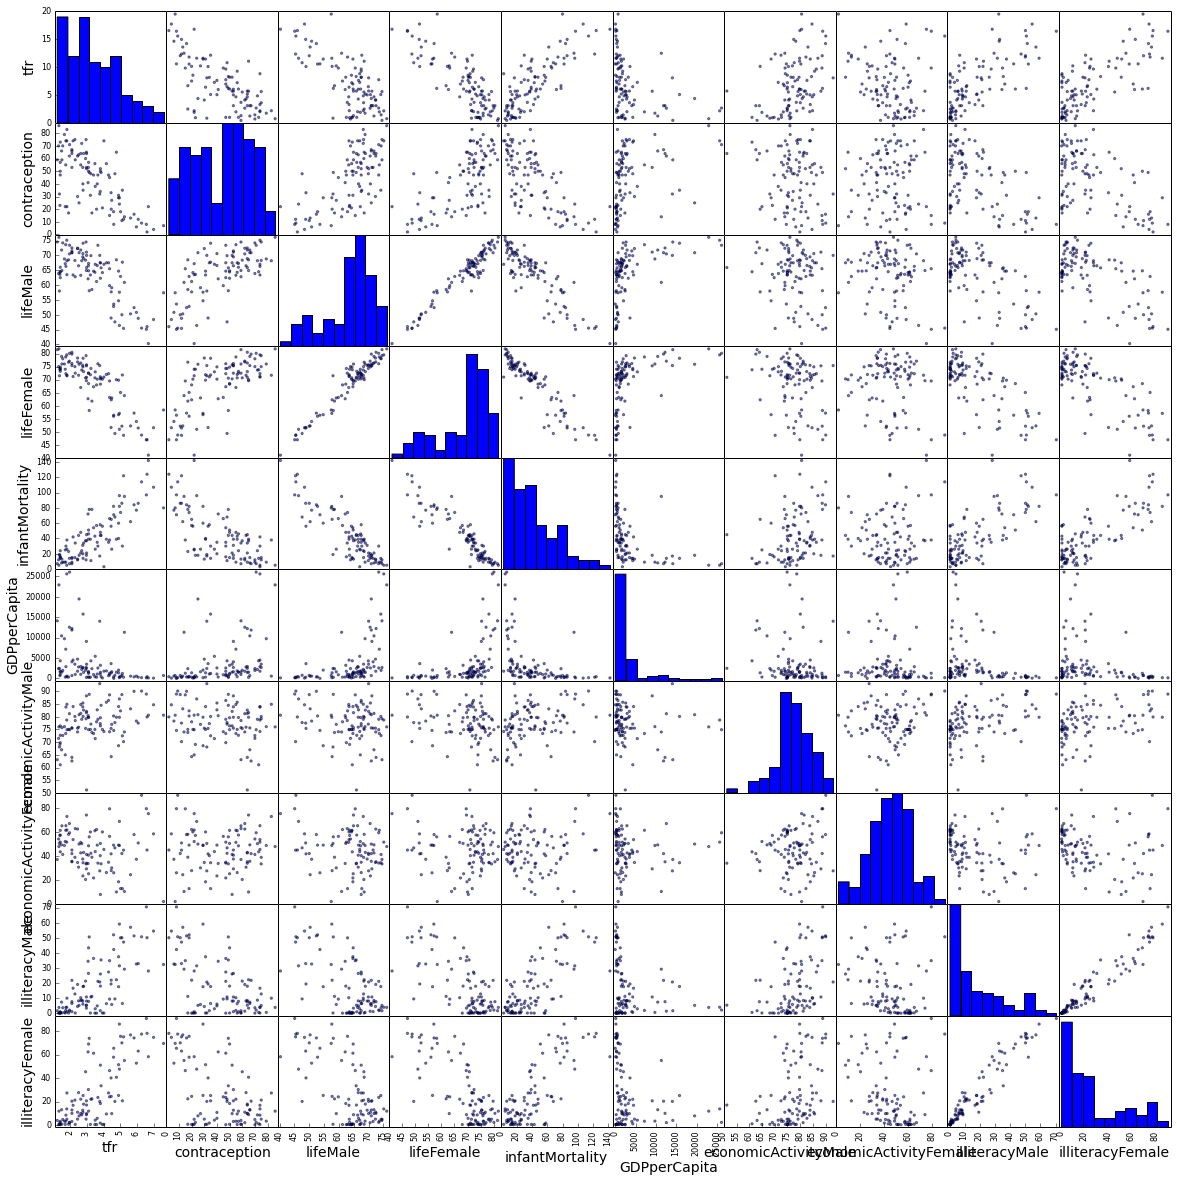

In [8]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 14
plot  = pd.scatter_matrix(df_no_missing)

### Use only 4 features

In [31]:
df2 = df[['country','region','tfr','lifeMale','lifeFemale','infantMortality','GDPperCapita']]
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 206
Data columns (total 7 columns):
country            188 non-null object
region             188 non-null object
tfr                188 non-null float64
lifeMale           188 non-null float64
lifeFemale         188 non-null float64
infantMortality    188 non-null float64
GDPperCapita       188 non-null float64
dtypes: float64(5), object(2)

In [32]:
df2['region'].nunique()

5

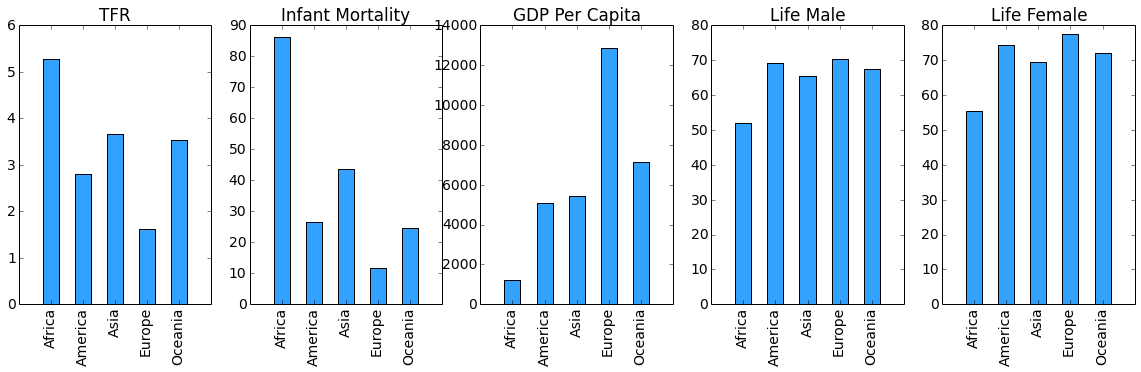

In [33]:
plt.rcParams['figure.figsize'] = (20, 5)
plt.rcParams['font.size'] = 14

df_region = df2.drop('country',axis=1).groupby('region').mean()

plt.subplot(151)
df_trg  = df_region['tfr']
df_trg_data = df_trg.tolist()
labels = df_trg.keys().get_values()

plt.bar(list(xrange(len(df_trg_data))),df_trg_data,0.5, color='#33A2FF', align='center')
plt.title('TFR')
ticks = plt.xticks(list(xrange(len(df_trg_data))), labels,rotation='vertical')

plt.subplot(152)
df_infantMortality  = df_region['infantMortality']
df_infantMortality_data = df_infantMortality.tolist()
labels = df_infantMortality.keys().get_values()

plt.bar(list(xrange(len(df_infantMortality_data))),df_infantMortality_data,0.5, color='#33A2FF', align='center')
plt.title('Infant Mortality')
ticks = plt.xticks(list(xrange(len(df_infantMortality_data))), labels,rotation='vertical')

plt.subplot(153)
df_GDPperCapita  = df_region['GDPperCapita']
df_GDPperCapita_data = df_GDPperCapita.tolist()
labels = df_GDPperCapita.keys().get_values()

plt.bar(list(xrange(len(df_GDPperCapita_data))),df_GDPperCapita_data,0.5, color='#33A2FF', align='center')
plt.title('GDP Per Capita')
ticks = plt.xticks(list(xrange(len(df_GDPperCapita_data))), labels,rotation='vertical')

plt.subplot(154)
df_lifeMale  = df_region['lifeMale']
df_lifeMale_data = df_lifeMale.tolist()
labels = df_lifeMale.keys().get_values()

plt.bar(list(xrange(len(df_lifeMale_data))),df_lifeMale_data,0.5, color='#33A2FF', align='center')
plt.title('Life Male')
ticks = plt.xticks(list(xrange(len(df_lifeMale_data))), labels,rotation='vertical')

plt.subplot(155)
df_lifeFemale  = df_region['lifeFemale']
df_lifeFemale_data = df_lifeFemale.tolist()
labels = df_lifeFemale.keys().get_values()

plt.bar(list(xrange(len(df_lifeFemale_data))),df_lifeFemale_data,0.5, color='#33A2FF', align='center')
plt.title('Life Female')
ticks = plt.xticks(list(xrange(len(df_lifeFemale_data))), labels,rotation='vertical')

In [34]:
df2['africa'] = df2['region'].map({'Africa':1,'America':0,'Asia':0,'Europe':0,'Oceania':0})
df2['america'] = df2['region'].map({'Africa':0,'America':1,'Asia':0,'Europe':0,'Oceania':0})
df2['asia'] = df2['region'].map({'Africa':0,'America':0,'Asia':1,'Europe':0,'Oceania':0})
df2['europe'] = df2['region'].map({'Africa':0,'America':0,'Asia':0,'Europe':1,'Oceania':0})
df2['oceania'] = df2['region'].map({'Africa':0,'America':0,'Asia':0,'Europe':0,'Oceania':1})
df2 = df2.drop('region',axis=1)

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 206
Data columns (total 11 columns):
country            188 non-null object
tfr                188 non-null float64
lifeMale           188 non-null float64
lifeFemale         188 non-null float64
infantMortality    188 non-null float64
GDPperCapita       188 non-null float64
africa             188 non-null int64
america            188 non-null int64
asia               188 non-null int64
europe             188 non-null int64
oceania            188 non-null int64
dtypes: float64(5), int64(5), object(1)

## Clustering

In [36]:
from sklearn.cluster import KMeans
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
labels = kmeans.fit_predict(df2.drop('country',axis=1).values)
df2['class'] = pd.DataFrame(labels)

In [37]:
df2.head()

,country,tfr,lifeMale,lifeFemale,infantMortality,GDPperCapita,africa,america,asia,europe,oceania,class
0,Afghanistan,6.90,45.0,46.0,154,2848,0,0,1,0,0,1
1,Albania,2.60,68.0,74.0,32,863,0,0,0,1,0,1
2,Algeria,3.81,67.5,70.3,44,1531,1,0,0,0,0,1
5,Angola,6.69,44.9,48.1,124,355,1,0,0,0,0,1
7,Argentina,2.62,69.6,76.8,22,8055,0,1,0,0,0,3


## Visualizing the results

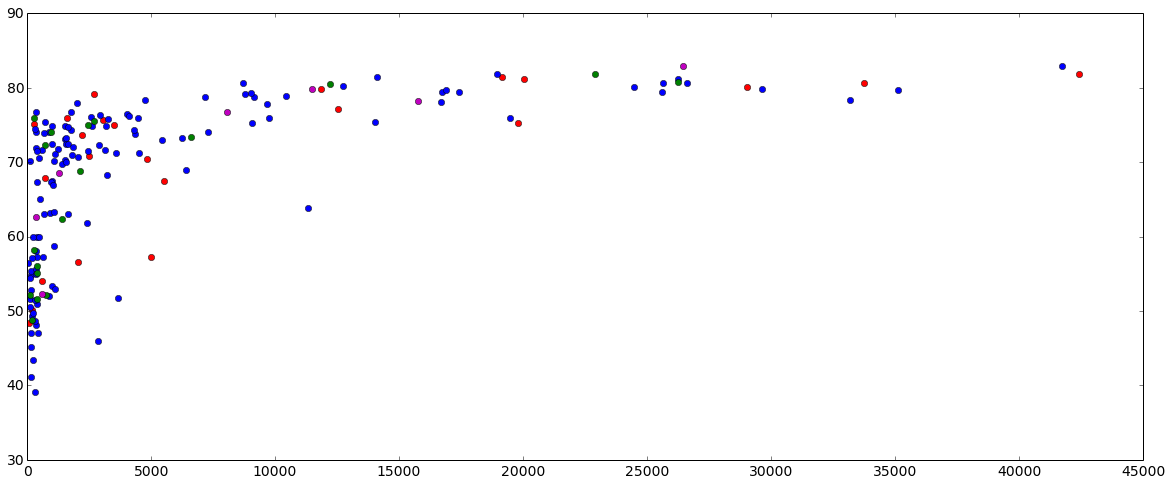

In [40]:
first_class_data = df2[df2['class'] == 0]
second_class_data = df2[df2['class'] == 1]
third_class_data = df2[df2['class'] == 2]
fourth_class_data = df2[df2['class'] == 3]

plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 14

##plot first class 
plt.plot(first_class_data['GDPperCapita'].values,first_class_data['lifeFemale'].values,'ro')
##plot second class
plt.plot(second_class_data['GDPperCapita'].values,second_class_data['lifeFemale'].values,'bo')
##plot third class
plt.plot(third_class_data['GDPperCapita'].values,third_class_data['lifeFemale'].values,'go')
##plot fourth class
plt.plot(fourth_class_data['GDPperCapita'].values,fourth_class_data['lifeFemale'].values,'mo')


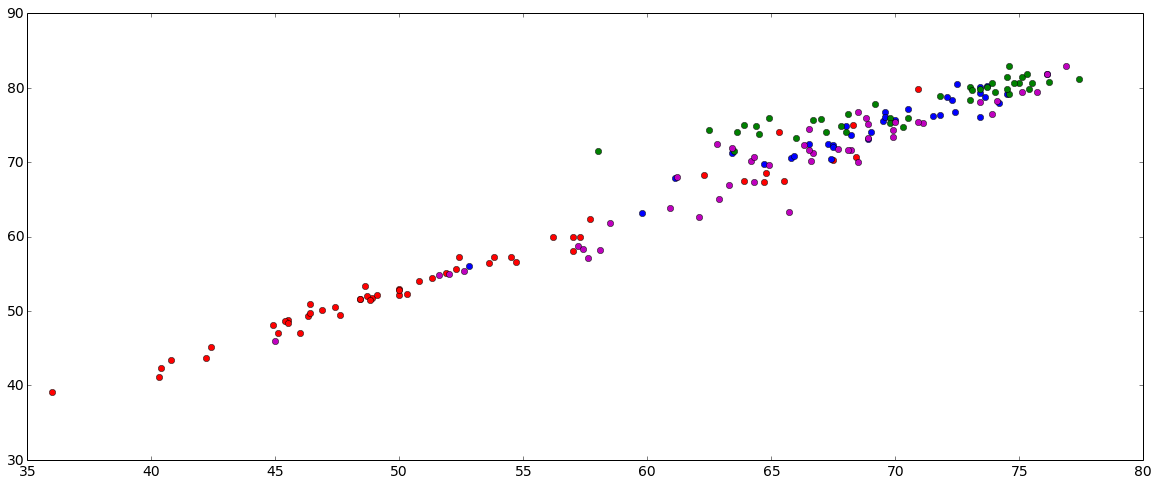

In [39]:
first_class_data = df2[df2['africa'] == 1]
second_class_data = df2[df2['america'] == 1]
third_class_data = df2[df2['europe'] == 1]
fourth_class_data = df2[df2['asia'] == 1]

plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['font.size'] = 14

##plot first class 
plt.plot(first_class_data['lifeMale'].values,first_class_data['lifeFemale'].values,'ro')
##plot second class
plt.plot(second_class_data['lifeMale'].values,second_class_data['lifeFemale'].values,'bo')
##plot third class
plt.plot(third_class_data['lifeMale'].values,third_class_data['lifeFemale'].values,'go')
##plot fourth class
plt.plot(fourth_class_data['lifeMale'].values,fourth_class_data['lifeFemale'].values,'mo')


In [50]:
a  = df2[df2['class'] == 0]
a['country']

9                  Australia
10                   Austria
12                   Bahamas
37                  Colombia
41                Costa.Rica
63          French.Polynesia
64                     Gabon
77                    Guyana
89                     Italy
97     Korea.Dem.Peoples.Rep
106                    Libya
108                Lithuania
121                Mauritius
128               Mozambique
130                  Namibia
137                    Niger
138                  Nigeria
140                   Norway
147                     Peru
149                   Poland
153                  Reunion
157              Saint.Kitts
179              Switzerland
Name: country, dtype: object